####  7Twelve Portfolio
* This notebook reproduces the charts in the blog article: [Retirement Portfolio-7Twelve](http://appliedvalueinvestor.com/2017/09/10/retirement-portfolio-7twelve/)

In [25]:
### Setup the environment
import os,sys
import pandas as pd
import pandas_datareader as web
import numpy as np
from datetime import datetime as dt
import matplotlib
import seaborn as sns
#%matplotlib inline
import pylab as py
py.ion()

import scipy as sp
import scipy.optimize as scopt
import scipy.stats as spstats
import warnings
warnings.filterwarnings('ignore')

HOME=os.environ['HOME']
file_path = os.path.dirname(os.path.realpath('__file__'))
sys_path='%s/..'%file_path
sys.path.append(sys_path)
from investmenttools import PortfolioBuilder as PB
reload(PB)

pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 6)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 78)
pd.set_option('precision', 3)

In [49]:
## Portfolio ticker
van=['OANIX','VEXRX','PTTRX','VIIIX']
tfund=['VFORX']

## Portfolio Weight
w_van=[.33,.11,.33,.22]
w_tfund=[1.0]


In [50]:
# Download data
## Not running this again, as I already downloaded the data
# for s in van:
#     print s
#     PB.download_ticker(s.upper(),dt(2016,12,1),dt(2017,8,31))
PB.download_ticker('VFORX',dt(2016,12,1),dt(2017,8,31))

https://finance.yahoo.com/quote/VFORX/history?period1=1480579200&period2=1504162800&interval=1d&filter=history&frequency=1d
/home/sachin/Downloads/VFORX.csv


In [51]:
#Collate portfolio data

data_van={};
data_tfund={}
for s in van:
    data_path='%s/Data/%s.csv'%(file_path,s.upper())
    data_van[s]=PB.get_data_from_csv(data_path,s)
portfolio_van=pd.DataFrame(data_van.values()).T 
portfolio_van.dropna(inplace=True)
portfolio_van.index=pd.to_datetime(portfolio_van.index)

data_tfund['VFORX']=PB.get_data_from_csv('%s/Data/%s.csv'%(file_path,'VFORX'),'VFORX')
portfolio_tfund=pd.DataFrame(data_tfund.values()).T 
portfolio_tfund.dropna(inplace=True)
portfolio_tfund.index=pd.to_datetime(portfolio_tfund.index)

## sanity check
portfolio_van.dropna(how='any',inplace=True)
print portfolio_van.head(5)
portfolio_van.shape

            OANIX  VEXRX  PTTRX   VIIIX
2016-12-01  22.09  82.58   9.96  201.00
2016-12-02  22.02  82.60   9.98  201.08
2016-12-06  22.51  84.57  10.01  202.96
2016-12-07  23.12  85.33  10.04  205.67
2016-12-08  23.07  86.42  10.02  206.14


(188, 4)

In [43]:
## Compute Portfolio Variance
svan=PB.calc_portfolio_var(portfolio_van,w_van)

print 'Var fo Van:',svan


Var fo Van: 5.19477693677


In [52]:
## Compute Portfolio returns with annual rebalancing
rvan=PB.Backtest_Annual_Rebalance(van,w_van,dt(2017,1,1),dt(2017,9,26),initial=10000,stk_data=portfolio_van)
rtfund=PB.Backtest_Annual_Rebalance(tfund,w_tfund,dt(2017,1,1),dt(2017,9,26),initial=10000,stk_data=portfolio_tfund)


In [53]:
## Compute Annual Returns
Pvan_dp=PB.calc_daily_returns(rvan[['Total','Cash']].sum(axis=1))
Pvan_ap=100*PB.calc_annual_returns(Pvan_dp)
Pvan_ap.name='Van'

Ptfund_dp=PB.calc_daily_returns(rtfund[['Total','Cash']].sum(axis=1))
Ptfund_ap=100*PB.calc_annual_returns(Ptfund_dp)
Ptfund_ap.name='tfund'

print Pvan_ap
print Ptfund_ap


2017    11.184
Name: Van, dtype: float64
2017    12.169
Name: tfund, dtype: float64


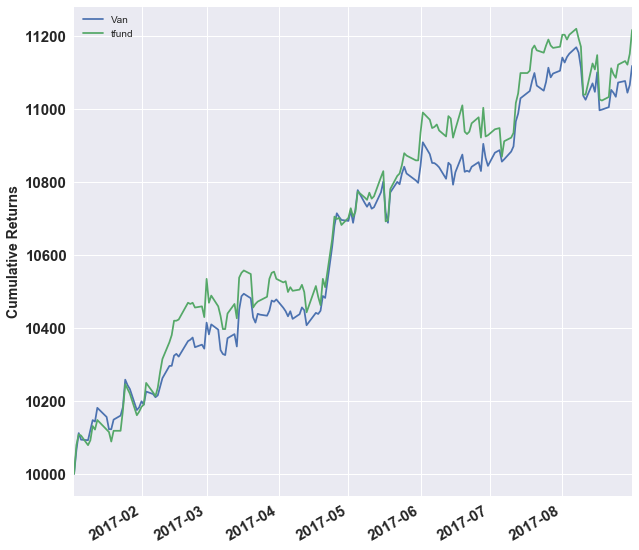

In [54]:
## Plot Cumulative And Annual Returns

py.figure(figsize=(10,10))
ax1=py.subplot(111)
py.hold('on')
rvan[['Total','Cash']].sum(axis=1).plot(ax=ax1)
rtfund[['Total','Cash']].sum(axis=1).plot(ax=ax1)

py.xticks(fontsize=15,fontweight='bold')
py.yticks(fontsize=15,fontweight='bold')
py.ylabel('Cumulative Returns',fontweight='bold',fontsize=14)
py.xlabel('')
py.legend(['Van','tfund'],loc='best')



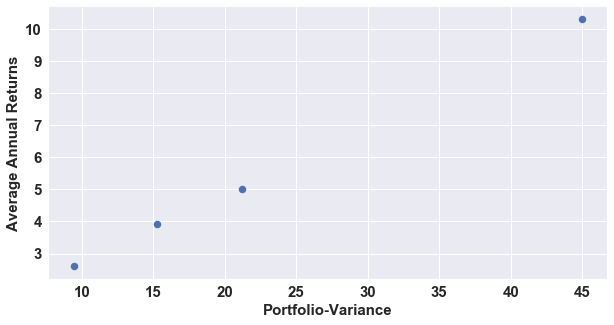

In [9]:
## Print Risk Return Profile

py.figure(figsize=(10,5));
py.plot(All_Var,avg_annual_returns.values,'.',markersize=15)
py.xticks(fontweight='bold',fontsize=15)
py.yticks(fontweight='bold',fontsize=15)
py.xlabel('Portfolio-Variance',fontweight='bold',fontsize=15)
py.ylabel('Average Annual Returns',fontweight='bold',fontsize=15)

## Perfect straiht line!!!!! quite unusall 